In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
import time
import re
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.svm import SVC
import pickle
import os
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
%matplotlib inline

os.chdir("/Users/alexdessouky/Desktop/MIDS/w266")

#load training data
twitter_train = pd.read_excel('./w266_final_project/StanceDataset/train.xlsx')

#load test data
twitter_test = pd.read_excel('./w266_final_project/StanceDataset/test.xlsx')

In [2]:
twitter_train.head()

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,"@tedcruz And, #HandOverTheServer she wiped cle...",Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
1,Hillary is our best choice if we truly want to...,Hillary Clinton,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
2,@TheView I think our country is ready for a fe...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
3,I just gave an unhealthy amount of my hard-ear...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,@PortiaABoulger Thank you for adding me to you...,Hillary Clinton,NONE,3. The tweet is not explicitly expressing opi...,pos


In [3]:
twitter_test.head()

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,He who exalts himself shall be humbled; a...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,pos
1,RT @prayerbullets: I remove Nehushtan -previou...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,other
2,@Brainman365 @heidtjj @BenjaminLives I have so...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,pos
3,#God is utterly powerless without Human interv...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,@David_Cameron Miracles of #Multiculturalism...,Atheism,AGAINST,2. The tweet does NOT expresses opinion about ...,neg


# Train Elmo models and write outputs to pickle files for use later

# DO NOT RUN UNLESS NECESSARY - TAKES VERY LONG

In [ ]:
#download elmo model
elmo = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)

## Obtain full Elmo outputs for training and test sets

In [ ]:
#function for training elmo model by passing a series of tweets
def elmo_vectors(x):
    embeddings = elmo(x.tolist(), signature="default", as_dict=True)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        sess.run(tf.tables_initializer())
        # return elmo output
        return sess.run(embeddings)

start_time_train = time.time()
train_elmo = elmo_vectors(twitter_train['Tweet'])
print("Training vectors done") 
end_time_train = time.time()
print("Training vectors time:",end_time_train - start_time_train)

start_time_test = time.time()
test_elmo = elmo_vectors(twitter_test['Tweet'])
print("Test vectors done")
end_time_test = time.time()
print("Testing vectors time:",end_time_test - start_time_test)

## Write full elmo outputs to pickle files for use later

In [ ]:
#write full elmo output for training to pickle
pickle1 = open('elmo_train.pickle','wb')
pickle.dump(train_elmo, pickle1)
pickle1.close()

#write test to pickle
pickle2 = open('elmo_test.pickle','wb')
pickle.dump(test_elmo, pickle2)
pickle2.close()

## Perform Mean Pooling on all Elmo layers and write to pickle for use later

In [ ]:
#pre-process the elmo vectors and write to pickle

#mean pooling vectors
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    lstm1_mean_train =  sess.run(tf.reduce_mean(train_vectors['lstm_outputs1'],1))
    print("LSTM1, Mean pool train shape:", lstm1_mean_train.shape)

pickle3 = open('lstm1_mean_train.pickle','wb')
pickle.dump(lstm1_mean_train, pickle3)
pickle3.close()
                        
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    lstm1_mean_test =  sess.run(tf.reduce_mean(test_vectors['lstm_outputs1'],1))
    print("LSTM1, Mean pool test shape:", lstm1_mean_test.shape)

pickle4 = open('lstm1_mean_test.pickle','wb')
pickle.dump(lstm1_mean_test, pickle4)
pickle4.close()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    lstm2_mean_train =  sess.run(tf.reduce_mean(train_vectors['lstm_outputs2'],1))
    print("LSTM2, Mean pool train shape:", lstm2_mean_train.shape)

pickle5 = open('lstm2_mean_train.pickle','wb')
pickle.dump(lstm2_mean_train, pickle5)
pickle5.close()
                        
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    lstm2_mean_test =  sess.run(tf.reduce_mean(test_vectors['lstm_outputs2'],1))
    print("LSTM2, Mean pool test shape:", lstm2_mean_test.shape)

pickle6 = open('lstm2_mean_test.pickle','wb')
pickle.dump(lstm2_mean_test, pickle6)
pickle6.close()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    elmo_mean_train =  sess.run(tf.reduce_mean(train_vectors['elmo'],1))
    print("ELMO, Mean pool train shape:", elmo_mean_train.shape)

pickle7 = open('elmo_mean_train.pickle','wb')
pickle.dump(elmo_mean_train, pickle7)
pickle7.close()
                        
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    elmo_mean_test =  sess.run(tf.reduce_mean(test_vectors['elmo'],1))
    print("ELMO, Mean pool test shape:", elmo_mean_test.shape)

pickle8 = open('elmo_mean_test.pickle','wb')
pickle.dump(elmo_mean_test, pickle8)
pickle8.close()

## Perform Max Pooling on all Elmo layers and write to pickle for use later

In [ ]:
#pre-process the elmo vectors and write to pickle

#max pooling vectors
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    lstm1_max_train =  sess.run(tf.reduce_max(train_vectors['lstm_outputs1'],1))
    print("LSTM1, Max pool train shape:", lstm1_max_train.shape)

pickle3 = open('lstm1_max_train.pickle','wb')
pickle.dump(lstm1_max_train, pickle3)
pickle3.close()
                        
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    lstm1_max_test =  sess.run(tf.reduce_max(test_vectors['lstm_outputs1'],1))
    print("LSTM1, max pool test shape:", lstm1_max_test.shape)

pickle4 = open('lstm1_max_test.pickle','wb')
pickle.dump(lstm1_max_test, pickle4)
pickle4.close()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    lstm2_max_train =  sess.run(tf.reduce_max(train_vectors['lstm_outputs2'],1))
    print("LSTM2, max pool train shape:", lstm2_max_train.shape)

pickle5 = open('lstm2_max_train.pickle','wb')
pickle.dump(lstm2_max_train, pickle5)
pickle5.close()
                        
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    lstm2_max_test =  sess.run(tf.reduce_max(test_vectors['lstm_outputs2'],1))
    print("LSTM2, max pool test shape:", lstm2_max_test.shape)

pickle6 = open('lstm2_max_test.pickle','wb')
pickle.dump(lstm2_max_test, pickle6)
pickle6.close()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    elmo_max_train =  sess.run(tf.reduce_max(train_vectors['elmo'],1))
    print("ELMO, max pool train shape:", elmo_max_train.shape)

pickle7 = open('elmo_max_train.pickle','wb')
pickle.dump(elmo_max_train, pickle7)
pickle7.close()
                        
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    elmo_max_test =  sess.run(tf.reduce_max(test_vectors['elmo'],1))
    print("ELMO, max pool test shape:", elmo_max_test.shape)

pickle8 = open('elmo_max_test.pickle','wb')
pickle.dump(elmo_max_test, pickle8)
pickle8.close()

## Perform Min Pooling on all Elmo layers and write to pickle for use later

In [ ]:
#pre-process the elmo vectors and write to pickle

#min pooling vectors
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    lstm1_min_train =  sess.run(tf.reduce_min(train_vectors['lstm_outputs1'],1))
    print("LSTM1, min pool train shape:", lstm1_min_train.shape)

pickle3 = open('lstm1_min_train.pickle','wb')
pickle.dump(lstm1_min_train, pickle3)
pickle3.close()
                        
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    lstm1_min_test =  sess.run(tf.reduce_min(test_vectors['lstm_outputs1'],1))
    print("LSTM1, min pool test shape:", lstm1_min_test.shape)

pickle4 = open('lstm1_min_test.pickle','wb')
pickle.dump(lstm1_min_test, pickle4)
pickle4.close()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    lstm2_min_train =  sess.run(tf.reduce_min(train_vectors['lstm_outputs2'],1))
    print("LSTM2, min pool train shape:", lstm2_min_train.shape)

pickle5 = open('lstm2_min_train.pickle','wb')
pickle.dump(lstm2_min_train, pickle5)
pickle5.close()
                        
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    lstm2_min_test =  sess.run(tf.reduce_min(test_vectors['lstm_outputs2'],1))
    print("LSTM2, min pool test shape:", lstm2_min_test.shape)

pickle6 = open('lstm2_min_test.pickle','wb')
pickle.dump(lstm2_min_test, pickle6)
pickle6.close()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    elmo_min_train =  sess.run(tf.reduce_min(train_vectors['elmo'],1))
    print("ELMO, min pool train shape:", elmo_min_train.shape)

pickle7 = open('elmo_min_train.pickle','wb')
pickle.dump(elmo_min_train, pickle7)
pickle7.close()
                        
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    elmo_min_test =  sess.run(tf.reduce_min(test_vectors['elmo'],1))
    print("ELMO, min pool test shape:", elmo_min_test.shape)

pickle8 = open('elmo_min_test.pickle','wb')
pickle.dump(elmo_min_test, pickle8)
pickle8.close()

## Code for loading full Elmo outputs from pickle files and prepping labelled data

In [76]:
# ELMO OUTPUTS
with open("./ELMO Outputs v.1/elmo_train.pickle", "rb") as f:
    train_vectors = pickle.load(f)
    
with open("./ELMO Outputs v.1/elmo_test.pickle", "rb") as f:
    test_vectors = pickle.load(f)

In [4]:
#PREP LABELS
stance_labels_train = np.array(twitter_train['Stance'].apply(lambda x: 
                                                                    2 if x == "FAVOR" else 
                                                                    (1 if x == "NONE" else 0)))

stance_labels_test = np.array(twitter_test['Stance'].apply(lambda x: 
                                                                    2 if x == "FAVOR" else 
                                                                    (1 if x == "NONE" else 0)))

## Helper function for model performances

In [9]:
def confusion_plot(confusion_matrix, target_names):
    # Plot confusion matrix (via imshow)
    plt.imshow(confusion_matrix, interpolation = "nearest", cmap = plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()

    # Loop through each value of the matrix to add data labels
    width, height = confusion_matrix.shape
    for x in range(width):
        for y in range(height):
            plt.annotate(str(confusion_matrix[x][y]), xy = (y, x), 
                        horizontalalignment = "center",
                        verticalalignment = "center")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Function for implementing SVM with different elmo vectors

In [10]:
def elmo_svm(train_data, test_data, topic_list):
    """Function that takes in the elmo vectors, a topic list, the elmo layer to use, and pooling method (if warranted).
    Outputs performance of SVM model based on the defined elmo parameters across defined the user defined topics."""
    
    #convert topic list to lower case
    for i in range(0,len(topic_list)):
        topic_list[i] = topic_list[i].lower()
    
    #find boolean series of all rows pertaining to the relevant topics
    matches_train = twitter_train['Target'].apply(lambda x: x.lower() in topic_list)
    matches_test = twitter_test['Target'].apply(lambda x: x.lower() in topic_list)
    
    #subset data and labels
    train_labels = stance_labels_train[matches_train]
    test_labels = stance_labels_test[matches_test]
    
    train_data = train_data[matches_train, :]
    test_data = test_data[matches_test, :]
    
    #Gridserach used for tuning hyperparameters (C and class weights)
    #param_grid = {'C':[0.001, 0.01, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1, 10, 100]}
    
    #svm_grid = SVC(kernel = 'linear')
    
    #grid = GridSearchCV(estimator=svm_grid, param_grid=param_grid, cv = 5, n_jobs = -1, verbose = 2)
    #grid.fit(train_data, train_labels)
    
    #print("Best Hyperparameters:")
    #print(grid.best_params_)
    
    #train model
    #svm = SVC(kernel = 'linear', C = grid.best_params_['C'])
    svm = SVC(kernel = 'linear')
    start_time_train = time.time()
    svm.fit(train_data, train_labels)
    end_time_train = time.time()
    print("Training time:", end_time_train - start_time_train)
    
    #prediction
    start_time_predict = time.time()
    stance_predict = svm.predict(test_data)
    end_time_predict = time.time()
    print("Prediction time:", end_time_predict - start_time_predict)
    
    #output metrics
    f1 = f1_score(test_labels, stance_predict, average = 'macro')
    
    report = classification_report(y_true = test_labels, 
                                        y_pred = stance_predict,
                                        target_names = ['Against', 'None', 'Favor'])
    
    confuse = confusion_matrix(y_true = test_labels, y_pred = stance_predict) 
    
    return f1, report, confuse

## Run SVM Models using the 'default' elmo output

Training time: 0.37593698501586914
Prediction time: 0.09478974342346191
F1 score for atheism: 0.48658725677359227
              precision    recall  f1-score   support

     Against       0.82      0.69      0.75       160
        None       0.29      0.43      0.35        28
       Favor       0.31      0.44      0.36        32

   micro avg       0.62      0.62      0.62       220
   macro avg       0.47      0.52      0.49       220
weighted avg       0.68      0.62      0.64       220



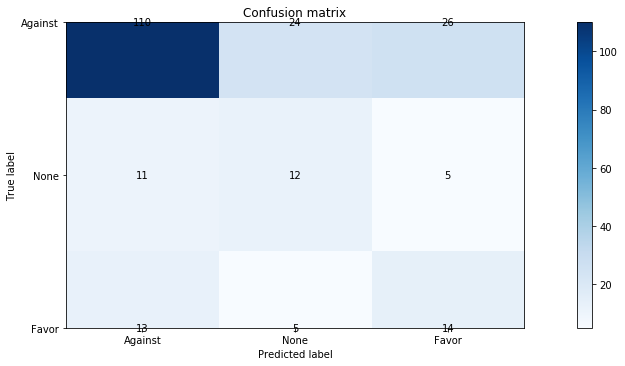

In [77]:
#Atheism
f1_ath, report_ath, confuse_ath = elmo_svm(train_vectors['default'], test_vectors['default'], ['Atheism'])
print("F1 score for atheism:", f1_ath)
print(report_ath)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_ath, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.6782660484313965
Prediction time: 0.18576812744140625
F1 score for Hillary 0.5313583144854005
              precision    recall  f1-score   support

     Against       0.68      0.81      0.74       172
        None       0.62      0.44      0.51        78
       Favor       0.38      0.31      0.34        45

   micro avg       0.63      0.63      0.63       295
   macro avg       0.56      0.52      0.53       295
weighted avg       0.62      0.63      0.62       295



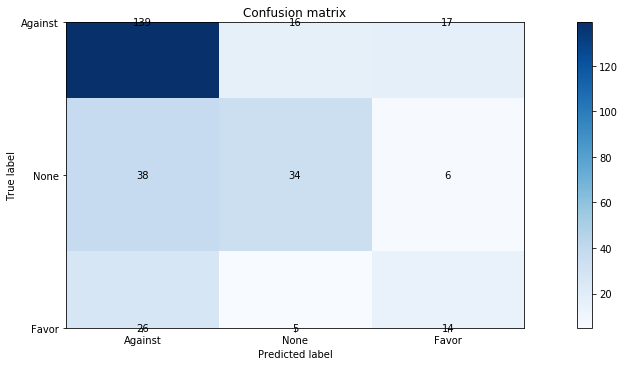

In [78]:
#Hillary
f1_hil, report_hil, confuse_hil = elmo_svm(train_vectors['default'], test_vectors['default'], ['Hillary Clinton'])
print("F1 score for Hillary", f1_hil)
print(report_hil)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_hil, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.5980269908905029
Prediction time: 0.1591041088104248
F1 score for Abortion 0.5646797908551777
              precision    recall  f1-score   support

     Against       0.81      0.69      0.75       189
        None       0.34      0.56      0.42        45
       Favor       0.52      0.52      0.52        46

   micro avg       0.64      0.64      0.64       280
   macro avg       0.56      0.59      0.56       280
weighted avg       0.69      0.64      0.66       280



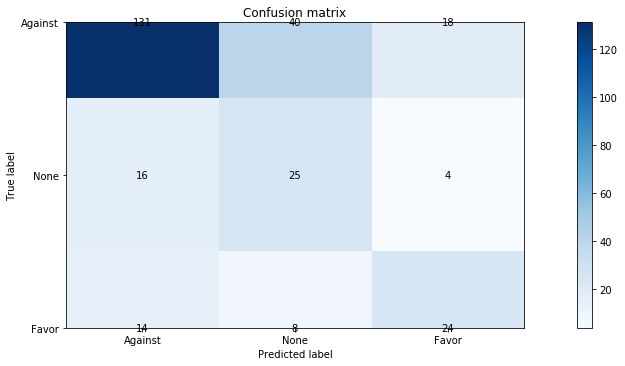

In [79]:
#Abortion
f1_abort, report_abort, confuse_abort = elmo_svm(train_vectors['default'], test_vectors['default'], 
                                                 ['Legalization of Abortion'])
print("F1 score for Abortion", f1_abort)
print(report_abort)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_abort, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.2009601593017578
Prediction time: 0.05547904968261719
F1 score for climate change 0.5247559458085774
              precision    recall  f1-score   support

     Against       0.33      0.09      0.14        11
        None       0.55      0.66      0.60        35
       Favor       0.83      0.84      0.83       123

   micro avg       0.75      0.75      0.75       169
   macro avg       0.57      0.53      0.52       169
weighted avg       0.74      0.75      0.74       169



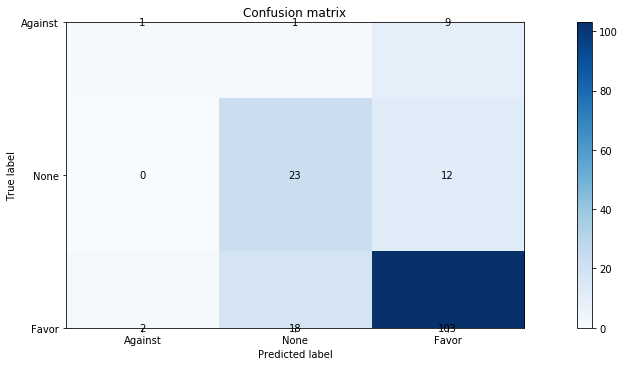

In [80]:
#Climate
f1_clim, report_clim, confuse_clim = elmo_svm(train_vectors['default'], test_vectors['default'], 
                                              ['Climate Change is a Real Concern'])
print("F1 score for climate change", f1_clim)
print(report_clim)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_clim, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.6777470111846924
Prediction time: 0.17822003364562988
F1 score for feminist mov 0.47482865002201496
              precision    recall  f1-score   support

     Against       0.72      0.63      0.67       183
        None       0.41      0.34      0.37        44
       Favor       0.32      0.48      0.38        58

   micro avg       0.55      0.55      0.55       285
   macro avg       0.48      0.48      0.47       285
weighted avg       0.59      0.55      0.57       285



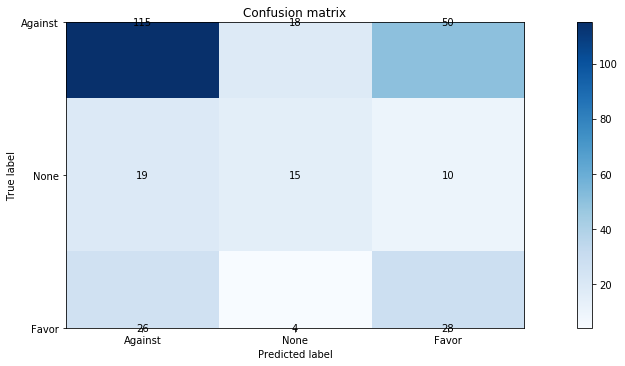

In [81]:
#Feminism
f1_fem, report_fem, confuse_fem = elmo_svm(train_vectors['default'], test_vectors['default'], 
                                           ['Feminist Movement'])
print("F1 score for feminist mov", f1_fem)
print(report_fem)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_fem, ['Against', 'None', 'Favor'])
plt.show()

Training time: 10.160454034805298
Prediction time: 2.8875808715820312
F1 score for all topics 0.5225258461049768
              precision    recall  f1-score   support

     Against       0.69      0.67      0.68       715
        None       0.41      0.47      0.44       230
       Favor       0.46      0.45      0.45       304

   micro avg       0.58      0.58      0.58      1249
   macro avg       0.52      0.53      0.52      1249
weighted avg       0.58      0.58      0.58      1249



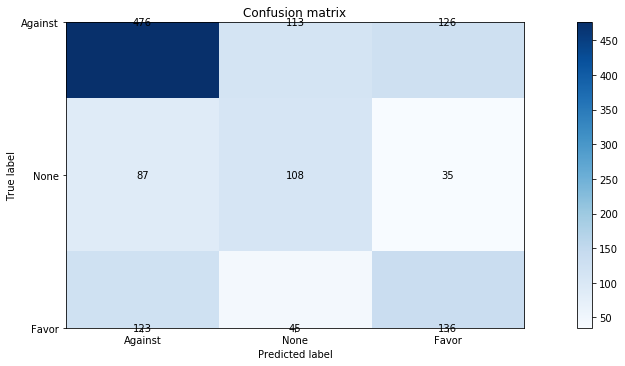

In [82]:
#All
all_tops = ['Hillary Clinton', 'Legalization of Abortion', 'Climate Change is a Real Concern',
           'Feminist Movement', 'Atheism']
f1_all, all_report, confuse_all = elmo_svm(train_vectors['default'], test_vectors['default'], all_tops)
print("F1 score for all topics", f1_all)
print(all_report)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_all, ['Against', 'None', 'Favor'])
plt.show()

# Experiments with Elmo vector outputs

## 1A) - LSTM1 layer with Max pooling

In [12]:
# Load relevant pickle files 
with open("./ELMO Outputs v.1/lstm1_max_train.pickle", "rb") as f:
    train_vectors = pickle.load(f)
    
with open("./ELMO Outp## 1A) - LSTM1 layer with Max poolinguts v.1/lstm1_max_test.pickle", "rb") as f:
    test_vectors = pickle.load(f)

Training time: 0.4946408271789551
Prediction time: 0.11146020889282227
F1 score for atheism: 0.5276364528941849
              precision    recall  f1-score   support

     Against       0.86      0.71      0.78       160
        None       0.31      0.54      0.39        28
       Favor       0.38      0.47      0.42        32

   micro avg       0.65      0.65      0.65       220
   macro avg       0.51      0.57      0.53       220
weighted avg       0.72      0.65      0.68       220



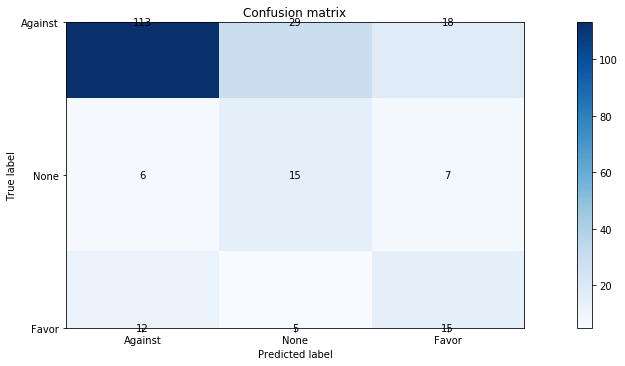

In [13]:
#Atheism
f1_ath, report_ath, confuse_ath = elmo_svm(train_vectors, test_vectors, ['Atheism'])
print("F1 score for atheism:", f1_ath)
print(report_ath)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_ath, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.7325026988983154
Prediction time: 0.20041918754577637
F1 score for Hillary 0.5316241612654726
              precision    recall  f1-score   support

     Against       0.68      0.79      0.73       172
        None       0.55      0.41      0.47        78
       Favor       0.44      0.36      0.40        45

   micro avg       0.62      0.62      0.62       295
   macro avg       0.56      0.52      0.53       295
weighted avg       0.61      0.62      0.61       295



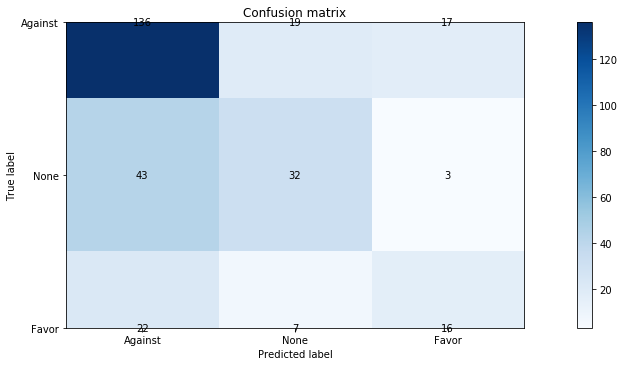

In [14]:
#Hillary
f1_hil, report_hil, confuse_hil = elmo_svm(train_vectors, test_vectors, ['Hillary Clinton'])
print("F1 score for Hillary", f1_hil)
print(report_hil)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_hil, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.6475138664245605
Prediction time: 0.17601704597473145
F1 score for Abortion 0.49658537809222736
              precision    recall  f1-score   support

     Against       0.76      0.70      0.73       189
        None       0.32      0.42      0.37        45
       Favor       0.40      0.39      0.40        46

   micro avg       0.61      0.61      0.61       280
   macro avg       0.49      0.51      0.50       280
weighted avg       0.63      0.61      0.62       280



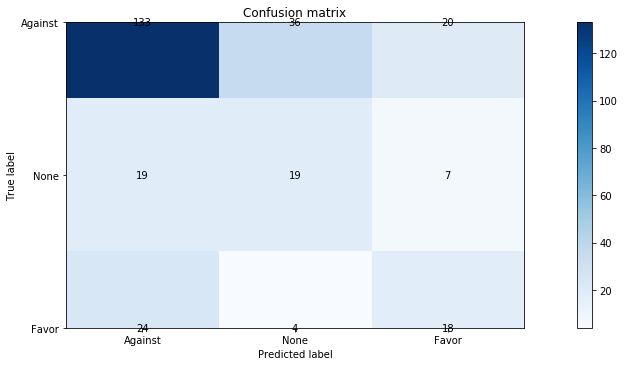

In [15]:
#Abortion
f1_abort, report_abort, confuse_abort = elmo_svm(train_vectors, test_vectors, 
                                                 ['Legalization of Abortion'])
print("F1 score for Abortion", f1_abort)
print(report_abort)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_abort, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.23661494255065918
Prediction time: 0.06498098373413086
F1 score for climate change 0.4192528735632184
              precision    recall  f1-score   support

     Against       0.00      0.00      0.00        11
        None       0.40      0.60      0.48        35
       Favor       0.79      0.76      0.77       123

   micro avg       0.67      0.67      0.67       169
   macro avg       0.40      0.45      0.42       169
weighted avg       0.66      0.67      0.66       169



/Users/alexdessouky/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/alexdessouky/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


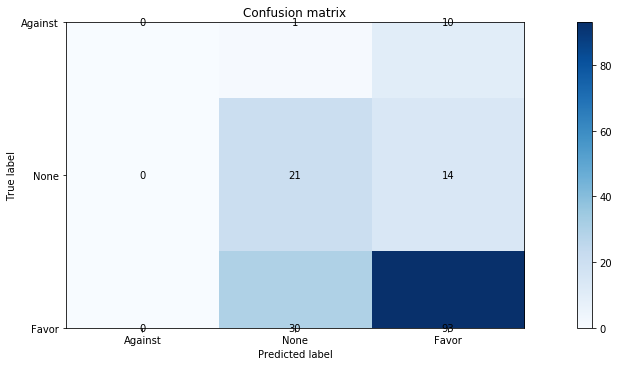

In [16]:
#Climate
f1_clim, report_clim, confuse_clim = elmo_svm(train_vectors, test_vectors, 
                                              ['Climate Change is a Real Concern'])
print("F1 score for climate change", f1_clim)
print(report_clim)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_clim, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.712522029876709
Prediction time: 0.20056390762329102
F1 score for feminist mov 0.4220171469397475
              precision    recall  f1-score   support

     Against       0.68      0.58      0.63       183
        None       0.35      0.27      0.31        44
       Favor       0.27      0.43      0.33        58

   micro avg       0.51      0.51      0.51       285
   macro avg       0.43      0.43      0.42       285
weighted avg       0.55      0.51      0.52       285



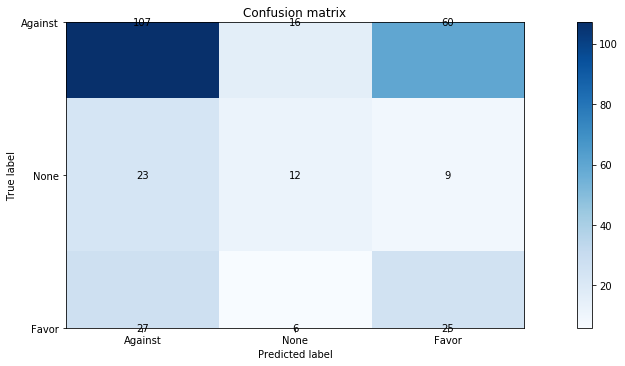

In [17]:
#Feminism
f1_fem, report_fem, confuse_fem = elmo_svm(train_vectors, test_vectors, 
                                           ['Feminist Movement'])
print("F1 score for feminist mov", f1_fem)
print(report_fem)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_fem, ['Against', 'None', 'Favor'])
plt.show()

Training time: 11.786903142929077
Prediction time: 2.997473955154419
F1 score for all topics 0.42530233949512125
              precision    recall  f1-score   support

     Against       0.64      0.60      0.62       715
        None       0.28      0.32      0.30       230
       Favor       0.35      0.37      0.36       304

   micro avg       0.49      0.49      0.49      1249
   macro avg       0.42      0.43      0.43      1249
weighted avg       0.50      0.49      0.50      1249



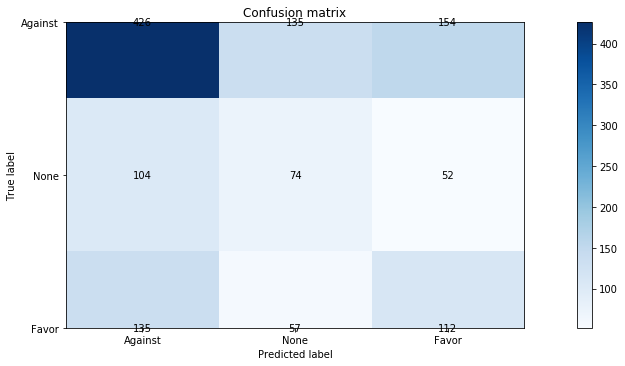

In [18]:
#All
all_tops = ['Hillary Clinton', 'Legalization of Abortion', 'Climate Change is a Real Concern',
           'Feminist Movement', 'Atheism']
f1_all, all_report, confuse_all = elmo_svm(train_vectors, test_vectors, all_tops)
print("F1 score for all topics", f1_all)
print(all_report)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_all, ['Against', 'None', 'Favor'])
plt.show()

## 1B) - LSTM2 layer with Max pooling

In [19]:
# Load relevant pickle files 
with open("./ELMO Outputs v.1/lstm2_max_train.pickle", "rb") as f:
    train_vectors = pickle.load(f)
    
with open("./ELMO Outputs v.1/lstm2_max_test.pickle", "rb") as f:
    test_vectors = pickle.load(f)

Training time: 0.40842294692993164
Prediction time: 0.11054015159606934
F1 score for atheism: 0.5201815781525926
              precision    recall  f1-score   support

     Against       0.84      0.72      0.77       160
        None       0.37      0.54      0.43        28
       Favor       0.31      0.41      0.35        32

   micro avg       0.65      0.65      0.65       220
   macro avg       0.50      0.55      0.52       220
weighted avg       0.70      0.65      0.67       220



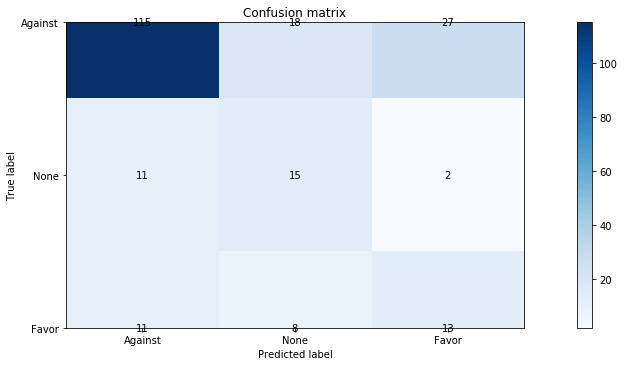

In [20]:
#Atheism
f1_ath, report_ath, confuse_ath = elmo_svm(train_vectors, test_vectors, ['Atheism'])
print("F1 score for atheism:", f1_ath)
print(report_ath)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_ath, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.7219321727752686
Prediction time: 0.2010040283203125
F1 score for Hillary 0.4936369142251495
              precision    recall  f1-score   support

     Against       0.65      0.75      0.70       172
        None       0.50      0.37      0.43        78
       Favor       0.38      0.33      0.36        45

   micro avg       0.59      0.59      0.59       295
   macro avg       0.51      0.49      0.49       295
weighted avg       0.57      0.59      0.57       295



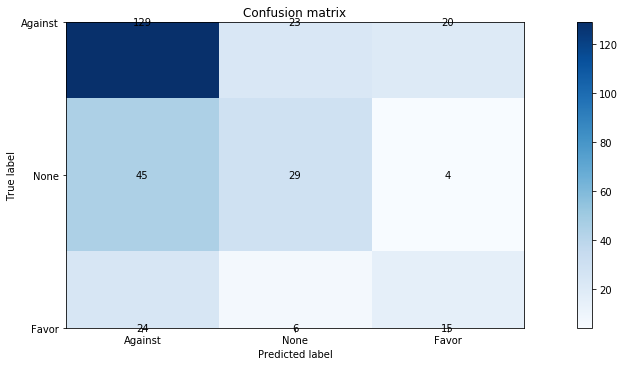

In [21]:
#Hillary
f1_hil, report_hil, confuse_hil = elmo_svm(train_vectors, test_vectors, ['Hillary Clinton'])
print("F1 score for Hillary", f1_hil)
print(report_hil)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_hil, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.6274838447570801
Prediction time: 0.17122387886047363
F1 score for Abortion 0.574652246369418
              precision    recall  f1-score   support

     Against       0.79      0.72      0.75       189
        None       0.41      0.64      0.50        45
       Favor       0.54      0.41      0.47        46

   micro avg       0.66      0.66      0.66       280
   macro avg       0.58      0.59      0.57       280
weighted avg       0.69      0.66      0.67       280



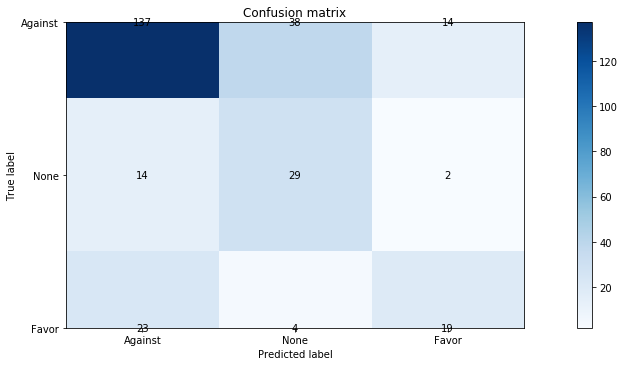

In [22]:
#Abortion
f1_abort, report_abort, confuse_abort = elmo_svm(train_vectors, test_vectors, 
                                                 ['Legalization of Abortion'])
print("F1 score for Abortion", f1_abort)
print(report_abort)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_abort, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.2205507755279541
Prediction time: 0.06259465217590332
F1 score for climate change 0.47949173744156953
              precision    recall  f1-score   support

     Against       0.00      0.00      0.00        11
        None       0.52      0.71      0.60        35
       Favor       0.84      0.83      0.84       123

   micro avg       0.75      0.75      0.75       169
   macro avg       0.45      0.51      0.48       169
weighted avg       0.72      0.75      0.73       169



/Users/alexdessouky/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/alexdessouky/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


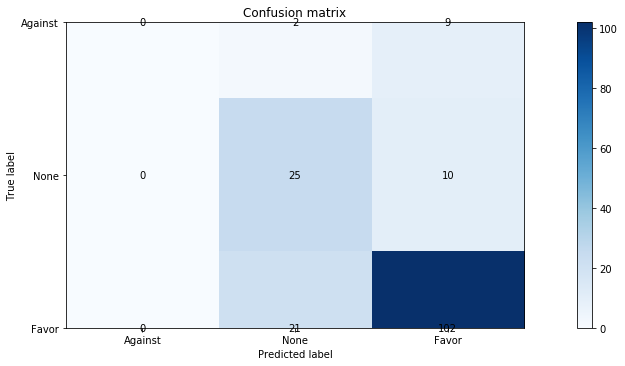

In [23]:
#Climate
f1_clim, report_clim, confuse_clim = elmo_svm(train_vectors, test_vectors, 
                                              ['Climate Change is a Real Concern'])
print("F1 score for climate change", f1_clim)
print(report_clim)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_clim, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.6885719299316406
Prediction time: 0.19428801536560059
F1 score for feminist mov 0.4801485811715991
              precision    recall  f1-score   support

     Against       0.72      0.64      0.68       183
        None       0.39      0.36      0.38        44
       Favor       0.33      0.47      0.39        58

   micro avg       0.56      0.56      0.56       285
   macro avg       0.48      0.49      0.48       285
weighted avg       0.59      0.56      0.57       285



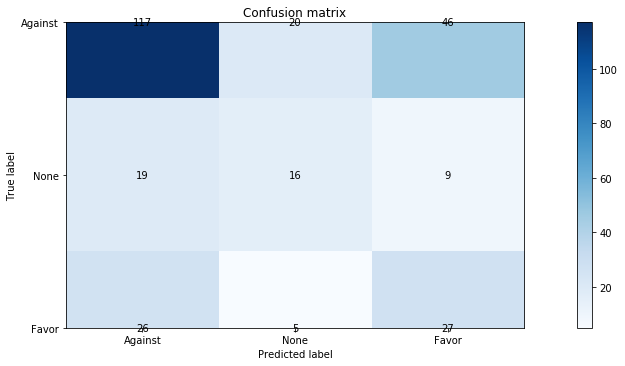

In [24]:
#Feminism
f1_fem, report_fem, confuse_fem = elmo_svm(train_vectors, test_vectors, 
                                           ['Feminist Movement'])
print("F1 score for feminist mov", f1_fem)
print(report_fem)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_fem, ['Against', 'None', 'Favor'])
plt.show()

Training time: 13.32673692703247
Prediction time: 2.7044517993927
F1 score for all topics 0.4512240290077778
              precision    recall  f1-score   support

     Against       0.66      0.60      0.63       715
        None       0.33      0.40      0.36       230
       Favor       0.36      0.38      0.37       304

   micro avg       0.51      0.51      0.51      1249
   macro avg       0.45      0.46      0.45      1249
weighted avg       0.52      0.51      0.51      1249



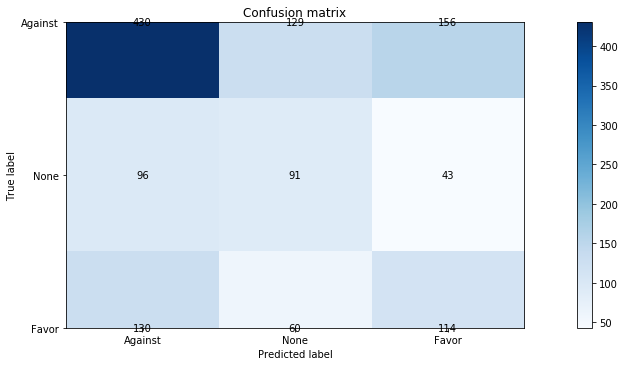

In [25]:
#All
all_tops = ['Hillary Clinton', 'Legalization of Abortion', 'Climate Change is a Real Concern',
           'Feminist Movement', 'Atheism']
f1_all, all_report, confuse_all = elmo_svm(train_vectors, test_vectors, all_tops)
print("F1 score for all topics", f1_all)
print(all_report)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_all, ['Against', 'None', 'Favor'])
plt.show()

## 1C) - ELMO with Max pooling

In [26]:
# Load relevant pickle files 
with open("./ELMO Outputs v.1/elmo_max_train.pickle", "rb") as f:
    train_vectors = pickle.load(f)
    
with open("./ELMO Outputs v.1/elmo_max_test.pickle", "rb") as f:
    test_vectors = pickle.load(f)

Training time: 0.40651392936706543
Prediction time: 0.1051790714263916
F1 score for atheism: 0.5066666666666667
              precision    recall  f1-score   support

     Against       0.83      0.72      0.77       160
        None       0.35      0.46      0.40        28
       Favor       0.30      0.41      0.35        32

   micro avg       0.65      0.65      0.65       220
   macro avg       0.49      0.53      0.51       220
weighted avg       0.69      0.65      0.66       220



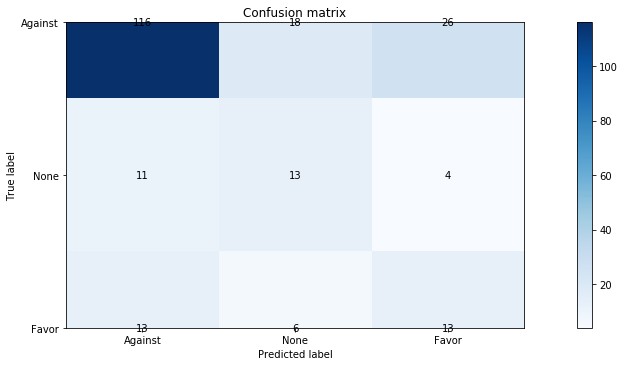

In [27]:
#Atheism
f1_ath, report_ath, confuse_ath = elmo_svm(train_vectors, test_vectors, ['Atheism'])
print("F1 score for atheism:", f1_ath)
print(report_ath)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_ath, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.7267348766326904
Prediction time: 0.1992790699005127
F1 score for Hillary 0.48741086796164246
              precision    recall  f1-score   support

     Against       0.67      0.73      0.70       172
        None       0.48      0.42      0.45        78
       Favor       0.34      0.29      0.31        45

   micro avg       0.58      0.58      0.58       295
   macro avg       0.50      0.48      0.49       295
weighted avg       0.57      0.58      0.57       295



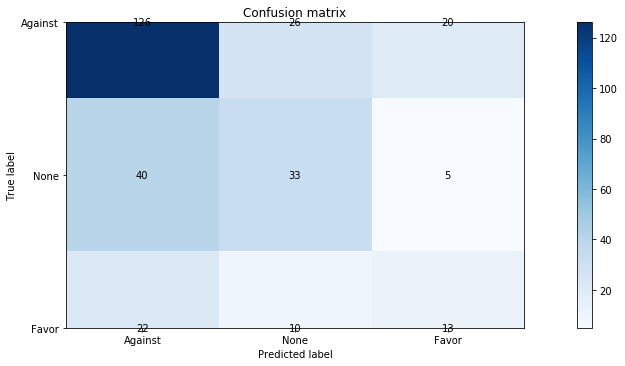

In [28]:
#Hillary
f1_hil, report_hil, confuse_hil = elmo_svm(train_vectors, test_vectors, ['Hillary Clinton'])
print("F1 score for Hillary", f1_hil)
print(report_hil)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_hil, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.6369249820709229
Prediction time: 0.17538690567016602
F1 score for Abortion 0.5562253887062071
              precision    recall  f1-score   support

     Against       0.78      0.69      0.73       189
        None       0.36      0.56      0.43        45
       Favor       0.52      0.48      0.50        46

   micro avg       0.64      0.64      0.64       280
   macro avg       0.55      0.58      0.56       280
weighted avg       0.67      0.64      0.65       280



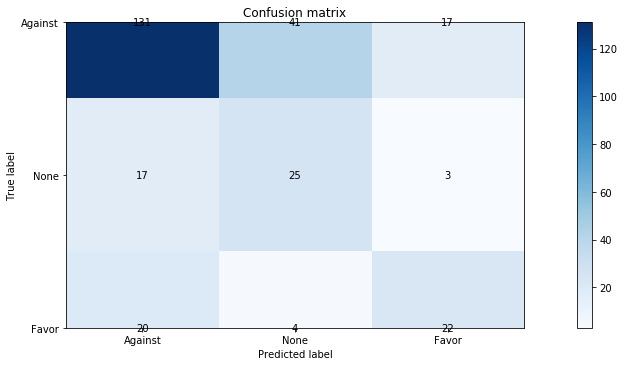

In [29]:
#Abortion
f1_abort, report_abort, confuse_abort = elmo_svm(train_vectors, test_vectors, 
                                                 ['Legalization of Abortion'])
print("F1 score for Abortion", f1_abort)
print(report_abort)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_abort, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.22024917602539062
Prediction time: 0.06351375579833984
F1 score for climate change 0.4352490421455939
              precision    recall  f1-score   support

     Against       0.00      0.00      0.00        11
        None       0.42      0.63      0.51        35
       Favor       0.82      0.78      0.80       123

   micro avg       0.70      0.70      0.70       169
   macro avg       0.41      0.47      0.44       169
weighted avg       0.68      0.70      0.69       169



/Users/alexdessouky/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/alexdessouky/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


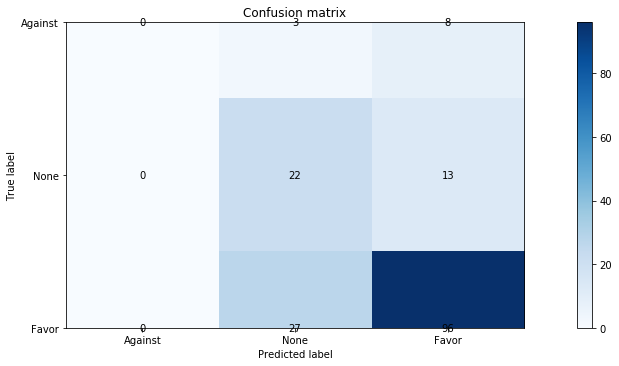

In [30]:
#Climate
f1_clim, report_clim, confuse_clim = elmo_svm(train_vectors, test_vectors, 
                                              ['Climate Change is a Real Concern'])
print("F1 score for climate change", f1_clim)
print(report_clim)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_clim, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.6892068386077881
Prediction time: 0.19136500358581543
F1 score for feminist mov 0.5164641536818989
              precision    recall  f1-score   support

     Against       0.75      0.62      0.68       183
        None       0.46      0.41      0.43        44
       Favor       0.35      0.57      0.44        58

   micro avg       0.58      0.58      0.58       285
   macro avg       0.52      0.53      0.52       285
weighted avg       0.62      0.58      0.59       285



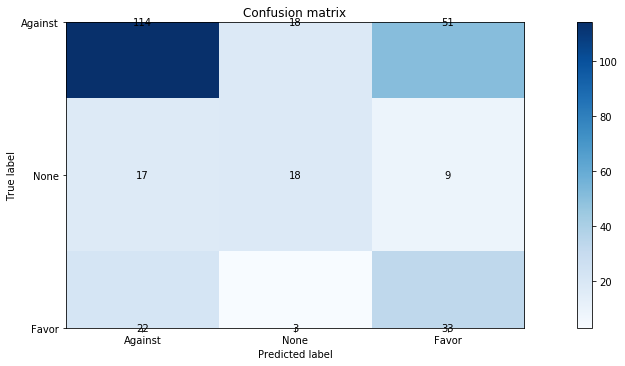

In [31]:
#Feminism
f1_fem, report_fem, confuse_fem = elmo_svm(train_vectors, test_vectors, 
                                           ['Feminist Movement'])
print("F1 score for feminist mov", f1_fem)
print(report_fem)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_fem, ['Against', 'None', 'Favor'])
plt.show()

Training time: 10.501724004745483
Prediction time: 2.7685439586639404
F1 score for all topics 0.4242887594923457
              precision    recall  f1-score   support

     Against       0.64      0.58      0.61       715
        None       0.31      0.34      0.32       230
       Favor       0.33      0.37      0.34       304

   micro avg       0.48      0.48      0.48      1249
   macro avg       0.42      0.43      0.42      1249
weighted avg       0.50      0.48      0.49      1249



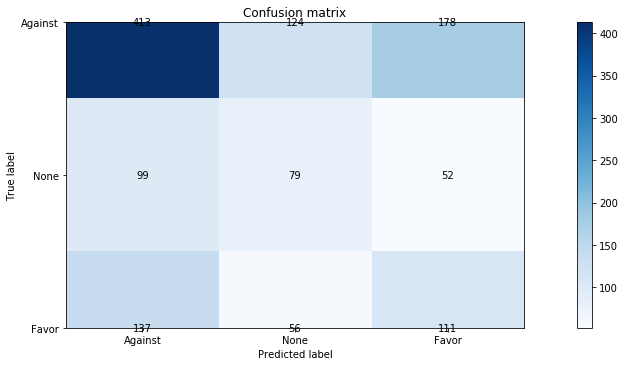

In [32]:
#All
all_tops = ['Hillary Clinton', 'Legalization of Abortion', 'Climate Change is a Real Concern',
           'Feminist Movement', 'Atheism']
f1_all, all_report, confuse_all = elmo_svm(train_vectors, test_vectors, all_tops)
print("F1 score for all topics", f1_all)
print(all_report)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_all, ['Against', 'None', 'Favor'])
plt.show()

## 2A) - LSTM1 with Min pooling

In [33]:
# Load relevant pickle files 
with open("./ELMO Outputs v.1/lstm1_min_train.pickle", "rb") as f:
    train_vectors = pickle.load(f)
    
with open("./ELMO Outputs v.1/lstm1_min_test.pickle", "rb") as f:
    test_vectors = pickle.load(f)

Training time: 0.4154789447784424
Prediction time: 0.10791707038879395
F1 score for atheism: 0.5322761924946854
              precision    recall  f1-score   support

     Against       0.84      0.74      0.79       160
        None       0.33      0.50      0.39        28
       Favor       0.39      0.44      0.41        32

   micro avg       0.67      0.67      0.67       220
   macro avg       0.52      0.56      0.53       220
weighted avg       0.71      0.67      0.69       220



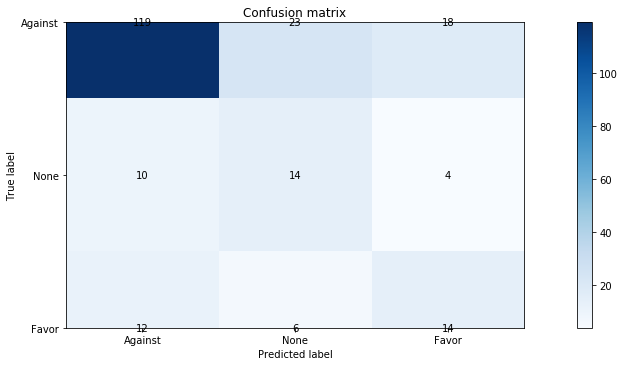

In [34]:
#Atheism
f1_ath, report_ath, confuse_ath = elmo_svm(train_vectors, test_vectors, ['Atheism'])
print("F1 score for atheism:", f1_ath)
print(report_ath)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_ath, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.726452112197876
Prediction time: 0.19736719131469727
F1 score for Hillary 0.4303369682680027
              precision    recall  f1-score   support

     Against       0.62      0.74      0.68       172
        None       0.42      0.31      0.36        78
       Favor       0.30      0.22      0.26        45

   micro avg       0.55      0.55      0.55       295
   macro avg       0.45      0.42      0.43       295
weighted avg       0.52      0.55      0.53       295



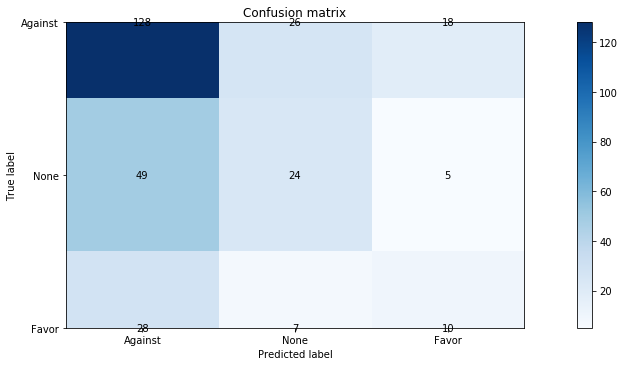

In [35]:
#Hillary
f1_hil, report_hil, confuse_hil = elmo_svm(train_vectors, test_vectors, ['Hillary Clinton'])
print("F1 score for Hillary", f1_hil)
print(report_hil)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_hil, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.6791670322418213
Prediction time: 0.18196892738342285
F1 score for Abortion 0.4649195259684596
              precision    recall  f1-score   support

     Against       0.75      0.62      0.68       189
        None       0.28      0.47      0.35        45
       Favor       0.35      0.37      0.36        46

   micro avg       0.56      0.56      0.56       280
   macro avg       0.46      0.49      0.46       280
weighted avg       0.61      0.56      0.58       280



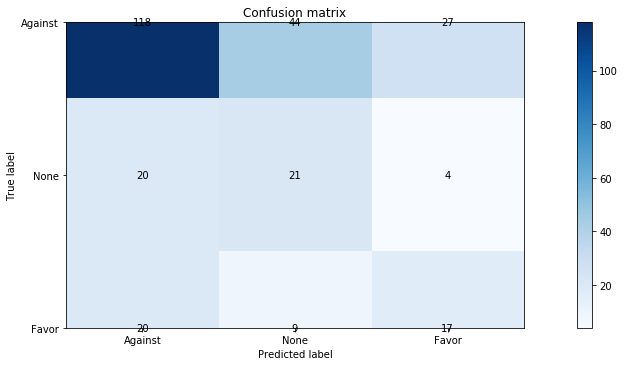

In [36]:
#Abortion
f1_abort, report_abort, confuse_abort = elmo_svm(train_vectors, test_vectors, 
                                                 ['Legalization of Abortion'])
print("F1 score for Abortion", f1_abort)
print(report_abort)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_abort, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.24489712715148926
Prediction time: 0.06867098808288574
F1 score for climate change 0.4425214713984768
              precision    recall  f1-score   support

     Against       0.00      0.00      0.00        11
        None       0.44      0.63      0.52        35
       Favor       0.82      0.80      0.81       123

   micro avg       0.71      0.71      0.71       169
   macro avg       0.42      0.48      0.44       169
weighted avg       0.69      0.71      0.70       169



/Users/alexdessouky/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/alexdessouky/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


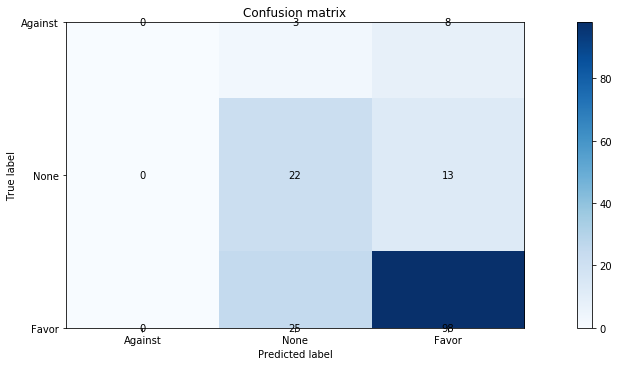

In [37]:
#Climate
f1_clim, report_clim, confuse_clim = elmo_svm(train_vectors, test_vectors, 
                                              ['Climate Change is a Real Concern'])
print("F1 score for climate change", f1_clim)
print(report_clim)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_clim, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.6893866062164307
Prediction time: 0.18862318992614746
F1 score for feminist mov 0.44704977855742895
              precision    recall  f1-score   support

     Against       0.72      0.58      0.65       183
        None       0.35      0.32      0.33        44
       Favor       0.29      0.48      0.36        58

   micro avg       0.52      0.52      0.52       285
   macro avg       0.45      0.46      0.45       285
weighted avg       0.58      0.52      0.54       285



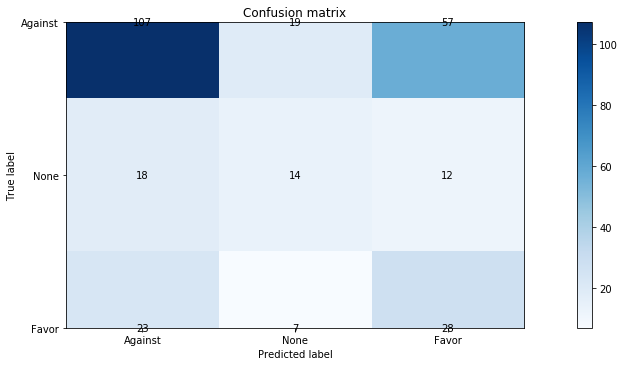

In [38]:
#Feminism
f1_fem, report_fem, confuse_fem = elmo_svm(train_vectors, test_vectors, 
                                           ['Feminist Movement'])
print("F1 score for feminist mov", f1_fem)
print(report_fem)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_fem, ['Against', 'None', 'Favor'])
plt.show()

Training time: 11.582045078277588
Prediction time: 2.7874670028686523
F1 score for all topics 0.41306459762246894
              precision    recall  f1-score   support

     Against       0.63      0.56      0.60       715
        None       0.27      0.33      0.29       230
       Favor       0.33      0.37      0.35       304

   micro avg       0.47      0.47      0.47      1249
   macro avg       0.41      0.42      0.41      1249
weighted avg       0.49      0.47      0.48      1249



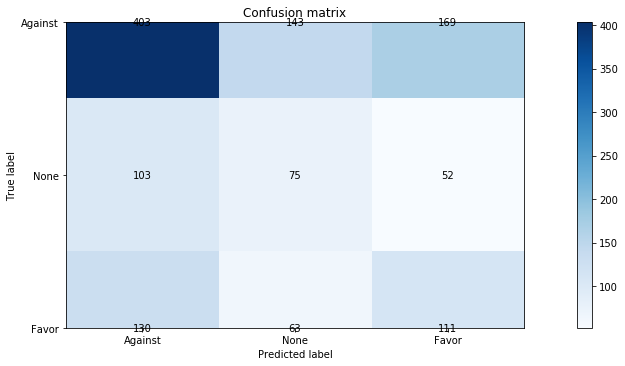

In [39]:
#All
all_tops = ['Hillary Clinton', 'Legalization of Abortion', 'Climate Change is a Real Concern',
           'Feminist Movement', 'Atheism']
f1_all, all_report, confuse_all = elmo_svm(train_vectors, test_vectors, all_tops)
print("F1 score for all topics", f1_all)
print(all_report)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_all, ['Against', 'None', 'Favor'])
plt.show()

## 2B) - LSTM2 with Min pooling

In [40]:
# Load relevant pickle files 
with open("./ELMO Outputs v.1/lstm2_min_train.pickle", "rb") as f:
    train_vectors = pickle.load(f)
    
with open("./ELMO Outputs v.1/lstm2_min_test.pickle", "rb") as f:
    test_vectors = pickle.load(f)

Training time: 0.4061100482940674
Prediction time: 0.1039590835571289
F1 score for atheism: 0.5071817040859016
              precision    recall  f1-score   support

     Against       0.81      0.72      0.77       160
        None       0.35      0.54      0.42        28
       Favor       0.32      0.34      0.33        32

   micro avg       0.65      0.65      0.65       220
   macro avg       0.49      0.53      0.51       220
weighted avg       0.68      0.65      0.66       220



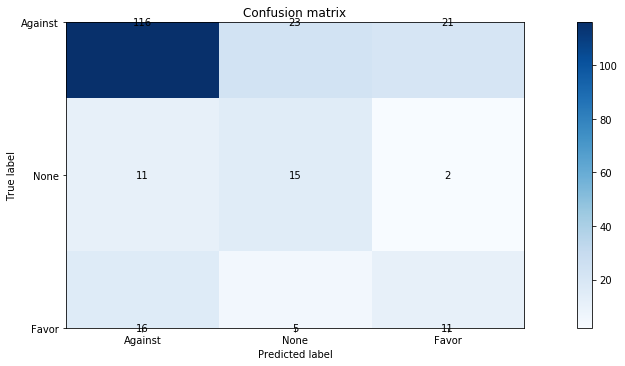

In [41]:
#Atheism
f1_ath, report_ath, confuse_ath = elmo_svm(train_vectors, test_vectors, ['Atheism'])
print("F1 score for atheism:", f1_ath)
print(report_ath)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_ath, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.7267978191375732
Prediction time: 0.19168996810913086
F1 score for Hillary 0.497483979314066
              precision    recall  f1-score   support

     Against       0.66      0.76      0.70       172
        None       0.54      0.49      0.51        78
       Favor       0.37      0.22      0.28        45

   micro avg       0.60      0.60      0.60       295
   macro avg       0.52      0.49      0.50       295
weighted avg       0.58      0.60      0.59       295



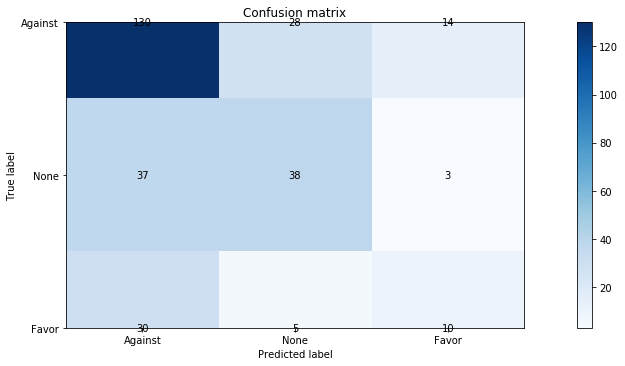

In [42]:
#Hillary
f1_hil, report_hil, confuse_hil = elmo_svm(train_vectors, test_vectors, ['Hillary Clinton'])
print("F1 score for Hillary", f1_hil)
print(report_hil)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_hil, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.6296727657318115
Prediction time: 0.17148590087890625
F1 score for Abortion 0.4740589422625175
              precision    recall  f1-score   support

     Against       0.74      0.65      0.69       189
        None       0.31      0.49      0.38        45
       Favor       0.36      0.35      0.35        46

   micro avg       0.57      0.57      0.57       280
   macro avg       0.47      0.49      0.47       280
weighted avg       0.61      0.57      0.59       280



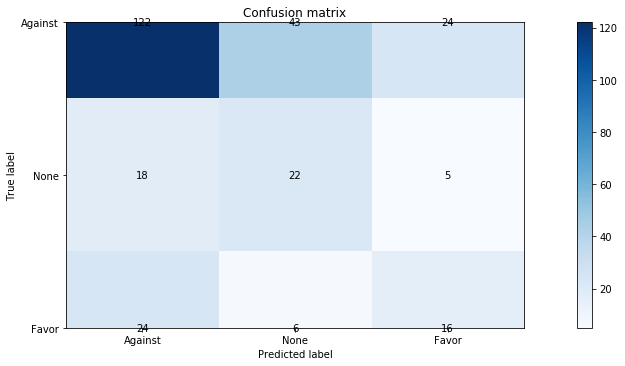

In [43]:
#Abortion
f1_abort, report_abort, confuse_abort = elmo_svm(train_vectors, test_vectors, 
                                                 ['Legalization of Abortion'])
print("F1 score for Abortion", f1_abort)
print(report_abort)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_abort, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.21065902709960938
Prediction time: 0.06476521492004395
F1 score for climate change 0.446260615468907
              precision    recall  f1-score   support

     Against       0.00      0.00      0.00        11
        None       0.42      0.71      0.53        35
       Favor       0.85      0.76      0.81       123

   micro avg       0.70      0.70      0.70       169
   macro avg       0.43      0.49      0.45       169
weighted avg       0.71      0.70      0.70       169



/Users/alexdessouky/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/alexdessouky/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


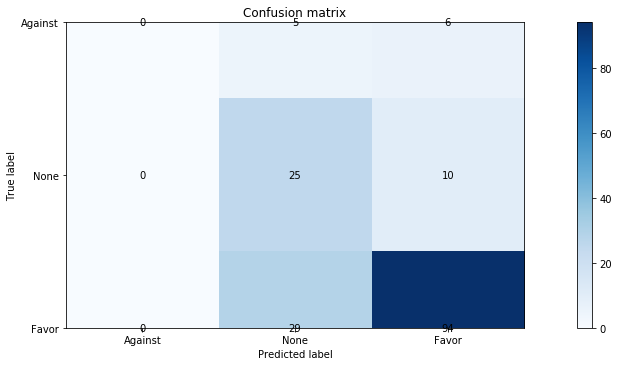

In [44]:
#Climate
f1_clim, report_clim, confuse_clim = elmo_svm(train_vectors, test_vectors, 
                                              ['Climate Change is a Real Concern'])
print("F1 score for climate change", f1_clim)
print(report_clim)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_clim, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.69134521484375
Prediction time: 0.1942579746246338
F1 score for feminist mov 0.43317250211356734
              precision    recall  f1-score   support

     Against       0.70      0.58      0.63       183
        None       0.33      0.30      0.31        44
       Favor       0.29      0.47      0.36        58

   micro avg       0.51      0.51      0.51       285
   macro avg       0.44      0.45      0.43       285
weighted avg       0.56      0.51      0.53       285



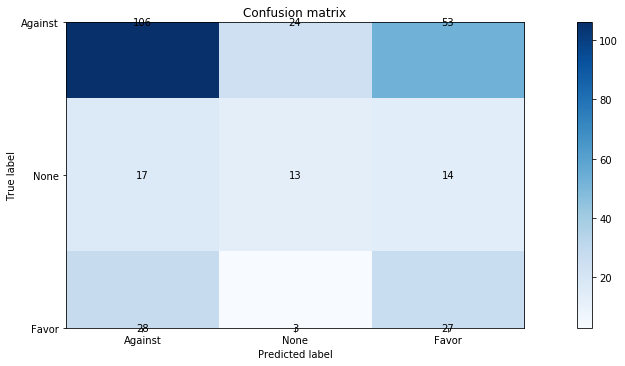

In [45]:
#Feminism
f1_fem, report_fem, confuse_fem = elmo_svm(train_vectors, test_vectors, 
                                           ['Feminist Movement'])
print("F1 score for feminist mov", f1_fem)
print(report_fem)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_fem, ['Against', 'None', 'Favor'])
plt.show()

Training time: 12.94780707359314
Prediction time: 2.7145750522613525
F1 score for all topics 0.4540521672260953
              precision    recall  f1-score   support

     Against       0.65      0.58      0.61       715
        None       0.33      0.43      0.38       230
       Favor       0.37      0.38      0.38       304

   micro avg       0.50      0.50      0.50      1249
   macro avg       0.45      0.46      0.45      1249
weighted avg       0.52      0.50      0.51      1249



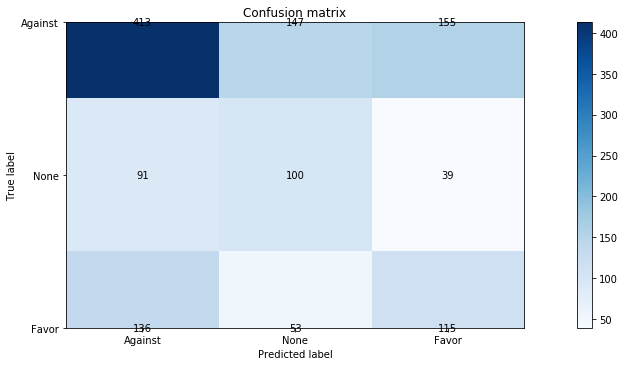

In [46]:
#All
all_tops = ['Hillary Clinton', 'Legalization of Abortion', 'Climate Change is a Real Concern',
           'Feminist Movement', 'Atheism']
f1_all, all_report, confuse_all = elmo_svm(train_vectors, test_vectors, all_tops)
print("F1 score for all topics", f1_all)
print(all_report)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_all, ['Against', 'None', 'Favor'])
plt.show()

## 2C) - ELMO with Min pooling

In [47]:
# Load relevant pickle files 
with open("./ELMO Outputs v.1/elmo_min_train.pickle", "rb") as f:
    train_vectors = pickle.load(f)
    
with open("./ELMO Outputs v.1/elmo_min_test.pickle", "rb") as f:
    test_vectors = pickle.load(f)

Training time: 0.41178107261657715
Prediction time: 0.10537219047546387
F1 score for atheism: 0.5158668730650154
              precision    recall  f1-score   support

     Against       0.83      0.74      0.78       160
        None       0.38      0.54      0.44        28
       Favor       0.31      0.34      0.32        32

   micro avg       0.66      0.66      0.66       220
   macro avg       0.50      0.54      0.52       220
weighted avg       0.69      0.66      0.67       220



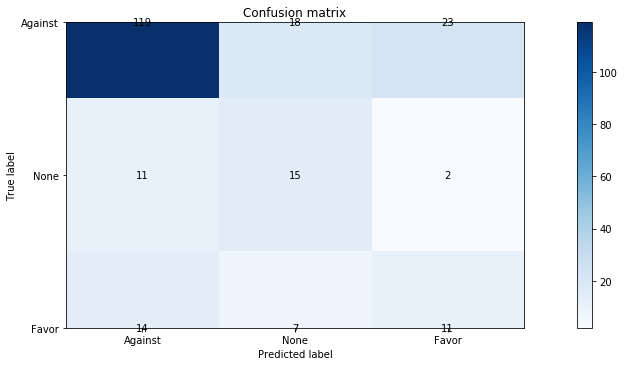

In [48]:
#Atheism
f1_ath, report_ath, confuse_ath = elmo_svm(train_vectors, test_vectors, ['Atheism'])
print("F1 score for atheism:", f1_ath)
print(report_ath)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_ath, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.7183611392974854
Prediction time: 0.19631099700927734
F1 score for Hillary 0.5108152805130536
              precision    recall  f1-score   support

     Against       0.66      0.75      0.70       172
        None       0.58      0.46      0.51        78
       Favor       0.35      0.29      0.32        45

   micro avg       0.60      0.60      0.60       295
   macro avg       0.53      0.50      0.51       295
weighted avg       0.59      0.60      0.59       295



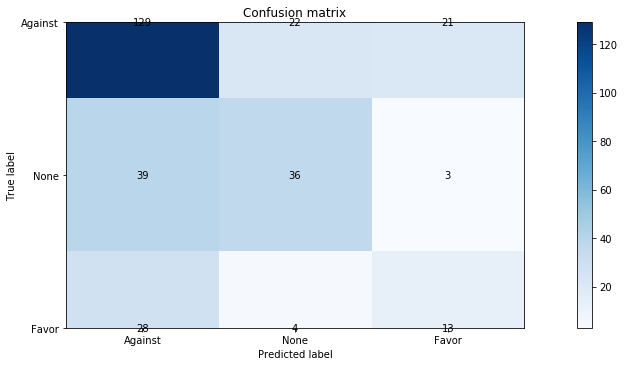

In [49]:
#Hillary
f1_hil, report_hil, confuse_hil = elmo_svm(train_vectors, test_vectors, ['Hillary Clinton'])
print("F1 score for Hillary", f1_hil)
print(report_hil)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_hil, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.6483199596405029
Prediction time: 0.1772911548614502
F1 score for Abortion 0.49937768067081084
              precision    recall  f1-score   support

     Against       0.76      0.67      0.71       189
        None       0.34      0.49      0.40        45
       Favor       0.38      0.39      0.38        46

   micro avg       0.60      0.60      0.60       280
   macro avg       0.49      0.52      0.50       280
weighted avg       0.63      0.60      0.61       280



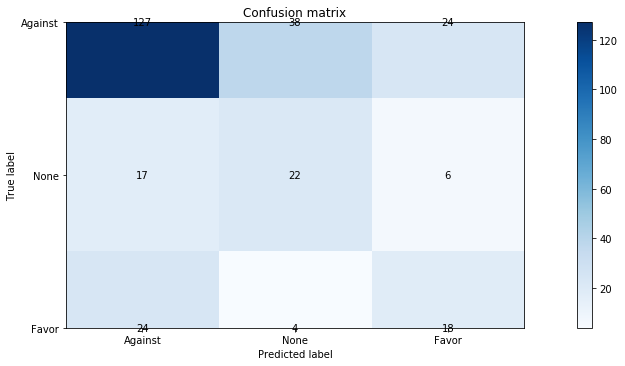

In [50]:
#Abortion
f1_abort, report_abort, confuse_abort = elmo_svm(train_vectors, test_vectors, 
                                                 ['Legalization of Abortion'])
print("F1 score for Abortion", f1_abort)
print(report_abort)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_abort, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.22393417358398438
Prediction time: 0.06370091438293457
F1 score for climate change 0.42870261052079234
              precision    recall  f1-score   support

     Against       0.00      0.00      0.00        11
        None       0.41      0.57      0.48        35
       Favor       0.82      0.80      0.81       123

   micro avg       0.70      0.70      0.70       169
   macro avg       0.41      0.46      0.43       169
weighted avg       0.68      0.70      0.69       169



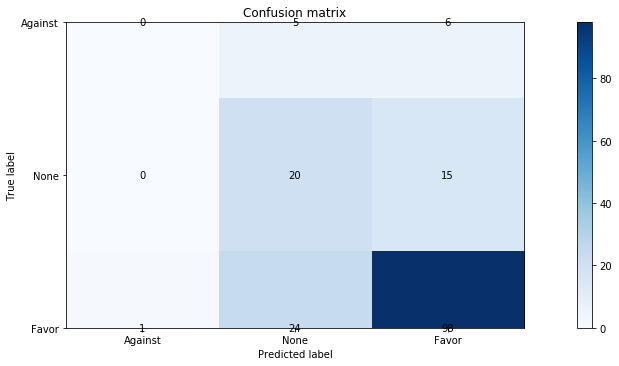

In [51]:
#Climate
f1_clim, report_clim, confuse_clim = elmo_svm(train_vectors, test_vectors, 
                                              ['Climate Change is a Real Concern'])
print("F1 score for climate change", f1_clim)
print(report_clim)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_clim, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.7013580799102783
Prediction time: 0.1910090446472168
F1 score for feminist mov 0.4742912652719984
              precision    recall  f1-score   support

     Against       0.76      0.62      0.68       183
        None       0.36      0.30      0.33        44
       Favor       0.33      0.57      0.42        58

   micro avg       0.56      0.56      0.56       285
   macro avg       0.48      0.49      0.47       285
weighted avg       0.61      0.56      0.57       285



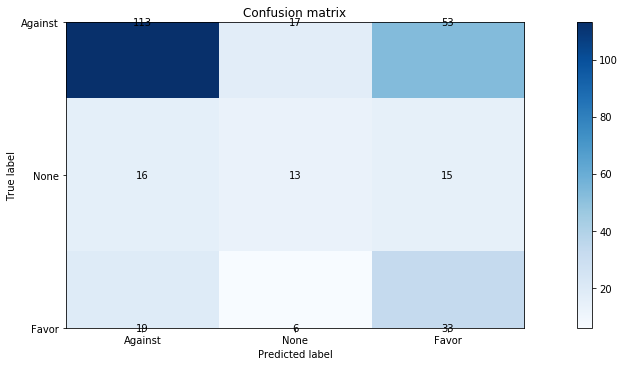

In [52]:
#Feminism
f1_fem, report_fem, confuse_fem = elmo_svm(train_vectors, test_vectors, 
                                           ['Feminist Movement'])
print("F1 score for feminist mov", f1_fem)
print(report_fem)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_fem, ['Against', 'None', 'Favor'])
plt.show()

Training time: 11.099475145339966
Prediction time: 2.720939874649048
F1 score for all topics 0.44224410149679083
              precision    recall  f1-score   support

     Against       0.65      0.57      0.61       715
        None       0.29      0.39      0.33       230
       Favor       0.38      0.39      0.39       304

   micro avg       0.49      0.49      0.49      1249
   macro avg       0.44      0.45      0.44      1249
weighted avg       0.52      0.49      0.50      1249



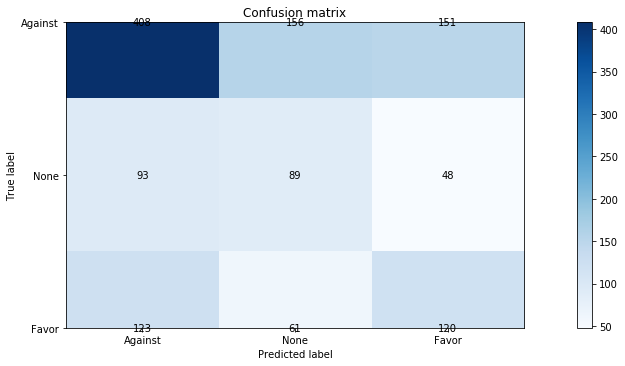

In [53]:
#All
all_tops = ['Hillary Clinton', 'Legalization of Abortion', 'Climate Change is a Real Concern',
           'Feminist Movement', 'Atheism']
f1_all, all_report, confuse_all = elmo_svm(train_vectors, test_vectors, all_tops)
print("F1 score for all topics", f1_all)
print(all_report)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_all, ['Against', 'None', 'Favor'])
plt.show()

## 3A) LSTM1 layer; Mean pooling

In [54]:
# Load relevant pickle files 
with open("./ELMO Outputs v.1/lstm1_mean_train.pickle", "rb") as f:
    train_vectors = pickle.load(f)
    
with open("./ELMO Outputs v.1/lstm1_mean_test.pickle", "rb") as f:
    test_vectors = pickle.load(f)

Training time: 0.29112887382507324
Prediction time: 0.0936589241027832
F1 score for atheism: 0.5478974319270332
              precision    recall  f1-score   support

     Against       0.86      0.72      0.79       160
        None       0.40      0.61      0.48        28
       Favor       0.33      0.44      0.38        32

   micro avg       0.67      0.67      0.67       220
   macro avg       0.53      0.59      0.55       220
weighted avg       0.72      0.67      0.69       220



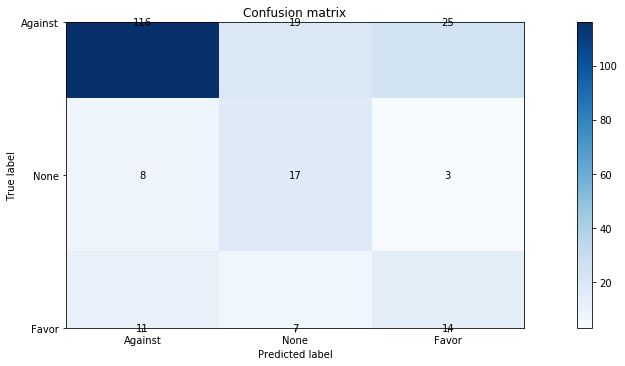

In [55]:
#Atheism
f1_ath, report_ath, confuse_ath = elmo_svm(train_vectors, test_vectors, ['Atheism'])
print("F1 score for atheism:", f1_ath)
print(report_ath)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_ath, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.5284669399261475
Prediction time: 0.18132281303405762
F1 score for Hillary 0.5206450835451598
              precision    recall  f1-score   support

     Against       0.69      0.78      0.73       172
        None       0.60      0.49      0.54        78
       Favor       0.32      0.27      0.29        45

   micro avg       0.62      0.62      0.62       295
   macro avg       0.54      0.51      0.52       295
weighted avg       0.61      0.62      0.61       295



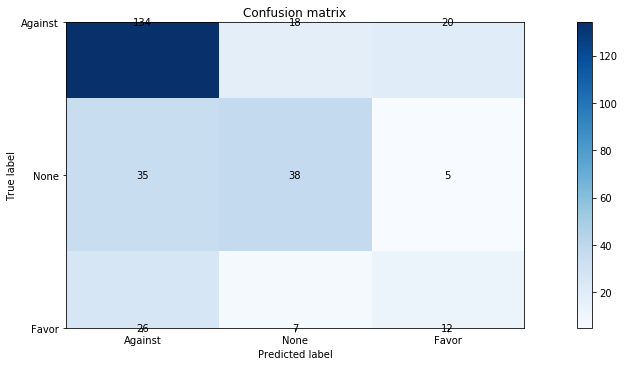

In [56]:
#Hillary
f1_hil, report_hil, confuse_hil = elmo_svm(train_vectors, test_vectors, ['Hillary Clinton'])
print("F1 score for Hillary", f1_hil)
print(report_hil)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_hil, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.4823000431060791
Prediction time: 0.16061615943908691
F1 score for Abortion 0.5322627681815124
              precision    recall  f1-score   support

     Against       0.77      0.70      0.73       189
        None       0.37      0.51      0.43        45
       Favor       0.44      0.43      0.44        46

   micro avg       0.62      0.62      0.62       280
   macro avg       0.53      0.55      0.53       280
weighted avg       0.65      0.62      0.63       280



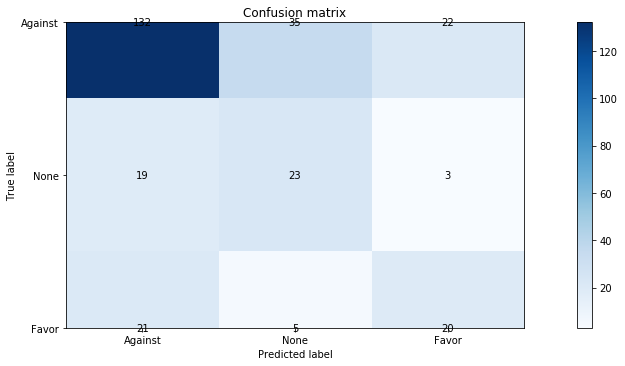

In [57]:
#Abortion
f1_abort, report_abort, confuse_abort = elmo_svm(train_vectors, test_vectors, 
                                                 ['Legalization of Abortion'])
print("F1 score for Abortion", f1_abort)
print(report_abort)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_abort, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.2033672332763672
Prediction time: 0.05627012252807617
F1 score for climate change 0.4430231212917513
              precision    recall  f1-score   support

     Against       0.00      0.00      0.00        11
        None       0.44      0.60      0.51        35
       Favor       0.83      0.81      0.82       123

   micro avg       0.72      0.72      0.72       169
   macro avg       0.42      0.47      0.44       169
weighted avg       0.70      0.72      0.70       169



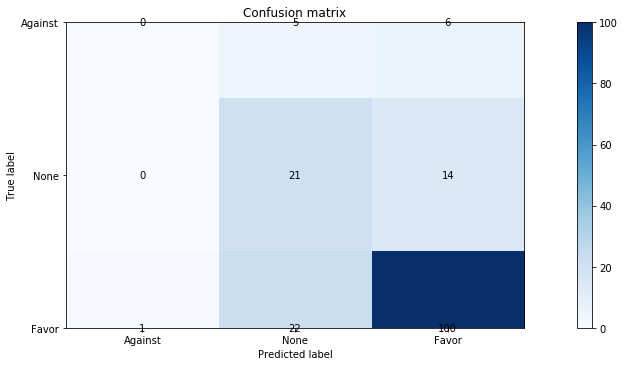

In [58]:
#Climate
f1_clim, report_clim, confuse_clim = elmo_svm(train_vectors, test_vectors, 
                                              ['Climate Change is a Real Concern'])
print("F1 score for climate change", f1_clim)
print(report_clim)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_clim, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.6418719291687012
Prediction time: 0.18806719779968262
F1 score for feminist mov 0.4788418579003406
              precision    recall  f1-score   support

     Against       0.71      0.60      0.65       183
        None       0.47      0.34      0.39        44
       Favor       0.31      0.53      0.39        58

   micro avg       0.54      0.54      0.54       285
   macro avg       0.50      0.49      0.48       285
weighted avg       0.59      0.54      0.56       285



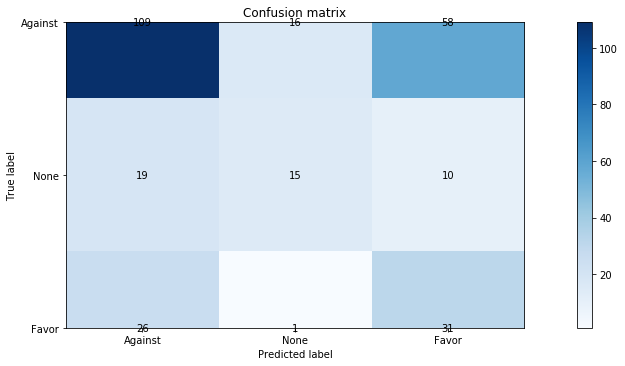

In [59]:
#Feminism
f1_fem, report_fem, confuse_fem = elmo_svm(train_vectors, test_vectors, 
                                           ['Feminist Movement'])
print("F1 score for feminist mov", f1_fem)
print(report_fem)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_fem, ['Against', 'None', 'Favor'])
plt.show()

Training time: 9.286026954650879
Prediction time: 3.184807300567627
F1 score for all topics 0.5018818481958847
              precision    recall  f1-score   support

     Against       0.68      0.64      0.66       715
        None       0.37      0.47      0.41       230
       Favor       0.45      0.42      0.43       304

   micro avg       0.55      0.55      0.55      1249
   macro avg       0.50      0.51      0.50      1249
weighted avg       0.57      0.55      0.56      1249



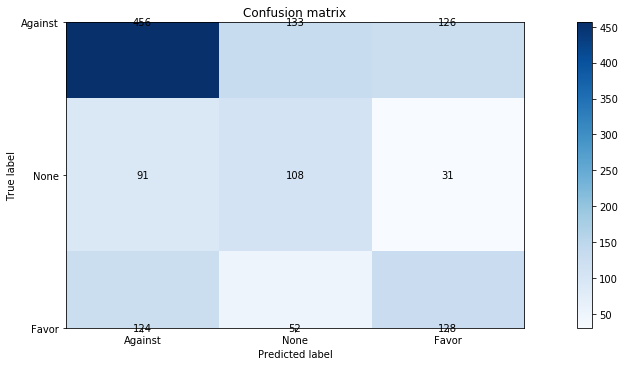

In [60]:
#All
all_tops = ['Hillary Clinton', 'Legalization of Abortion', 'Climate Change is a Real Concern',
           'Feminist Movement', 'Atheism']
f1_all, all_report, confuse_all = elmo_svm(train_vectors, test_vectors, all_tops)
print("F1 score for all topics", f1_all)
print(all_report)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_all, ['Against', 'None', 'Favor'])
plt.show()

## 3B) LSTM2 Layer; Mean pooling

In [61]:
# Load relevant pickle files 
with open("./ELMO Outputs v.1/lstm2_mean_train.pickle", "rb") as f:
    train_vectors = pickle.load(f)
    
with open("./ELMO Outputs v.1/lstm2_mean_test.pickle", "rb") as f:
    test_vectors = pickle.load(f)

Training time: 0.2745051383972168
Prediction time: 0.08768510818481445
F1 score for atheism: 0.5198265064998365
              precision    recall  f1-score   support

     Against       0.85      0.69      0.76       160
        None       0.34      0.50      0.41        28
       Favor       0.33      0.50      0.40        32

   micro avg       0.64      0.64      0.64       220
   macro avg       0.50      0.56      0.52       220
weighted avg       0.71      0.64      0.66       220



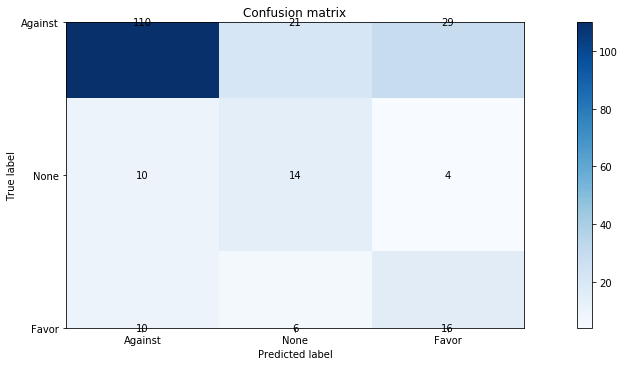

In [62]:
#Atheism
f1_ath, report_ath, confuse_ath = elmo_svm(train_vectors, test_vectors, ['Atheism'])
print("F1 score for atheism:", f1_ath)
print(report_ath)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_ath, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.5975461006164551
Prediction time: 0.17694687843322754
F1 score for Hillary 0.5313817330210773
              precision    recall  f1-score   support

     Against       0.69      0.78      0.73       172
        None       0.60      0.47      0.53        78
       Favor       0.36      0.31      0.33        45

   micro avg       0.63      0.63      0.63       295
   macro avg       0.55      0.52      0.53       295
weighted avg       0.62      0.63      0.62       295



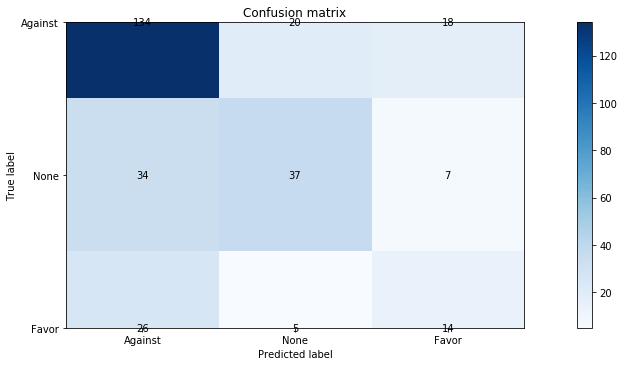

In [63]:
#Hillary
f1_hil, report_hil, confuse_hil = elmo_svm(train_vectors, test_vectors, ['Hillary Clinton'])
print("F1 score for Hillary", f1_hil)
print(report_hil)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_hil, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.5936622619628906
Prediction time: 0.15559697151184082
F1 score for Abortion 0.5111282314672145
              precision    recall  f1-score   support

     Against       0.77      0.67      0.72       189
        None       0.33      0.53      0.41        45
       Favor       0.43      0.39      0.41        46

   micro avg       0.60      0.60      0.60       280
   macro avg       0.51      0.53      0.51       280
weighted avg       0.64      0.60      0.62       280



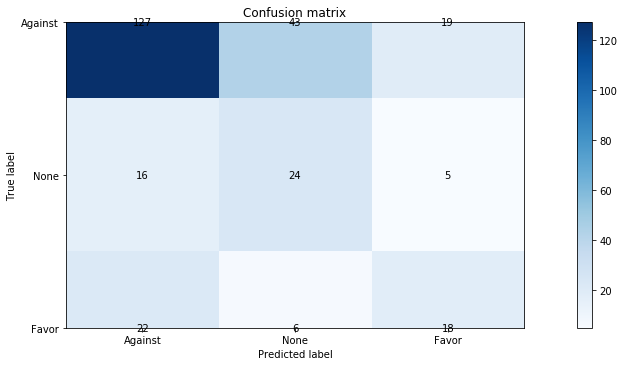

In [64]:
#Abortion
f1_abort, report_abort, confuse_abort = elmo_svm(train_vectors, test_vectors, 
                                                 ['Legalization of Abortion'])
print("F1 score for Abortion", f1_abort)
print(report_abort)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_abort, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.19666719436645508
Prediction time: 0.05285215377807617
F1 score for climate change 0.4816644368975335
              precision    recall  f1-score   support

     Against       0.00      0.00      0.00        11
        None       0.55      0.69      0.61        35
       Favor       0.84      0.84      0.84       123

   micro avg       0.75      0.75      0.75       169
   macro avg       0.46      0.51      0.48       169
weighted avg       0.72      0.75      0.74       169



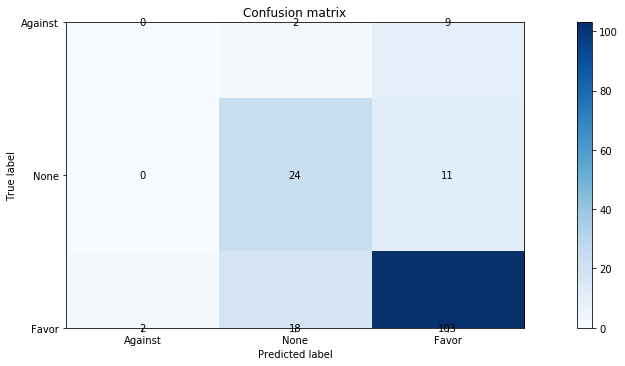

In [65]:
#Climate
f1_clim, report_clim, confuse_clim = elmo_svm(train_vectors, test_vectors, 
                                              ['Climate Change is a Real Concern'])
print("F1 score for climate change", f1_clim)
print(report_clim)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_clim, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.6659440994262695
Prediction time: 0.17591404914855957
F1 score for feminist mov 0.4704399908481542
              precision    recall  f1-score   support

     Against       0.73      0.64      0.68       183
        None       0.33      0.30      0.31        44
       Favor       0.35      0.52      0.42        58

   micro avg       0.56      0.56      0.56       285
   macro avg       0.47      0.48      0.47       285
weighted avg       0.59      0.56      0.57       285



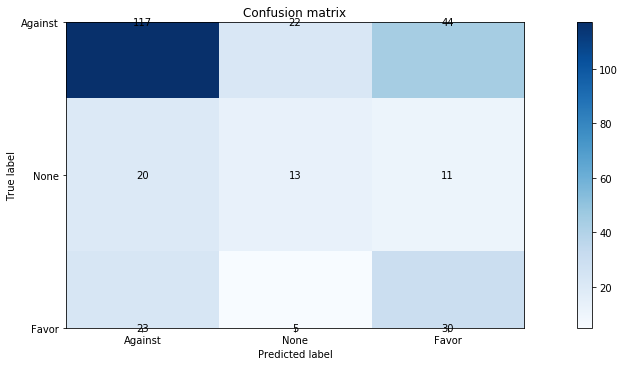

In [66]:
#Feminism
f1_fem, report_fem, confuse_fem = elmo_svm(train_vectors, test_vectors, 
                                           ['Feminist Movement'])
print("F1 score for feminist mov", f1_fem)
print(report_fem)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_fem, ['Against', 'None', 'Favor'])
plt.show()

Training time: 10.396520853042603
Prediction time: 2.914306879043579
F1 score for all topics 0.5112405970680761
              precision    recall  f1-score   support

     Against       0.69      0.64      0.67       715
        None       0.37      0.46      0.41       230
       Favor       0.46      0.45      0.46       304

   micro avg       0.56      0.56      0.56      1249
   macro avg       0.51      0.52      0.51      1249
weighted avg       0.58      0.56      0.57      1249



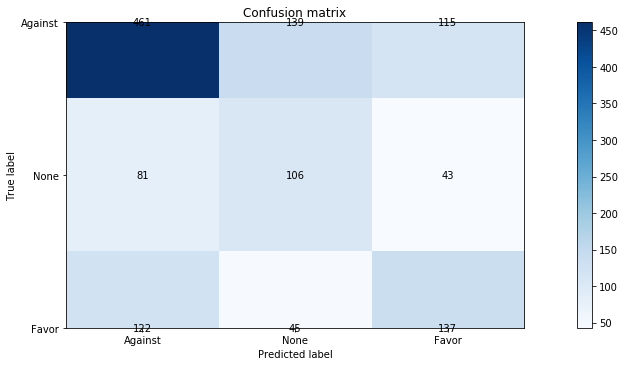

In [67]:
#All
all_tops = ['Hillary Clinton', 'Legalization of Abortion', 'Climate Change is a Real Concern',
           'Feminist Movement', 'Atheism']
f1_all, all_report, confuse_all = elmo_svm(train_vectors, test_vectors, all_tops)
print("F1 score for all topics", f1_all)
print(all_report)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_all, ['Against', 'None', 'Favor'])
plt.show()

## 3C) ELMO Layer; Mean pooling

In [69]:
# Load relevant pickle files 
with open("./ELMO Outputs v.1/elmo_mean_train.pickle", "rb") as f:
    train_vectors = pickle.load(f)
    
with open("./ELMO Outputs v.1/elmo_mean_test.pickle", "rb") as f:
    test_vectors = pickle.load(f)

Training time: 0.2814979553222656
Prediction time: 0.0888209342956543
F1 score for atheism: 0.5441633672056329
              precision    recall  f1-score   support

     Against       0.84      0.71      0.77       160
        None       0.39      0.54      0.45        28
       Favor       0.34      0.50      0.41        32

   micro avg       0.66      0.66      0.66       220
   macro avg       0.53      0.58      0.54       220
weighted avg       0.71      0.66      0.68       220



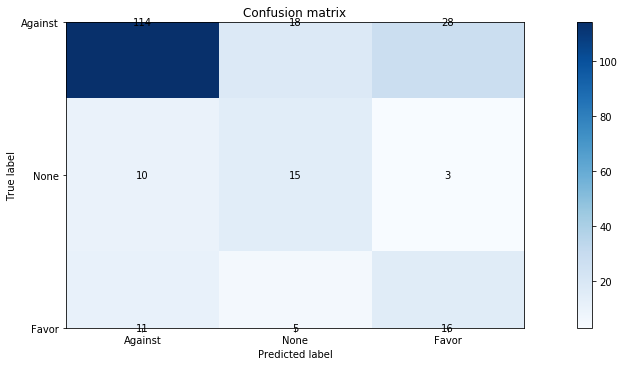

In [70]:
#Atheism
f1_ath, report_ath, confuse_ath = elmo_svm(train_vectors, test_vectors, ['Atheism'])
print("F1 score for atheism:", f1_ath)
print(report_ath)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_ath, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.5088238716125488
Prediction time: 0.18260407447814941
F1 score for Hillary 0.5344745028803416
              precision    recall  f1-score   support

     Against       0.69      0.80      0.74       172
        None       0.61      0.47      0.53        78
       Favor       0.38      0.29      0.33        45

   micro avg       0.64      0.64      0.64       295
   macro avg       0.56      0.52      0.53       295
weighted avg       0.62      0.64      0.62       295



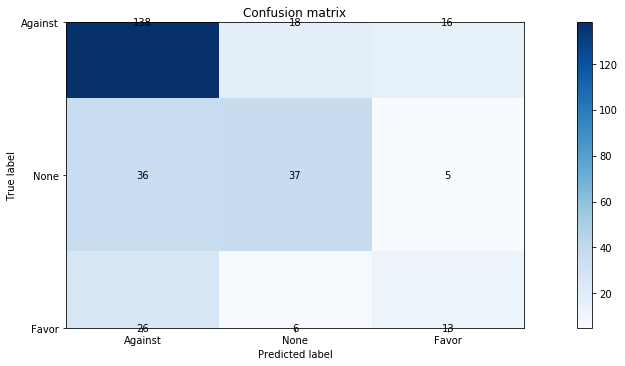

In [71]:
#Hillary
f1_hil, report_hil, confuse_hil = elmo_svm(train_vectors, test_vectors, ['Hillary Clinton'])
print("F1 score for Hillary", f1_hil)
print(report_hil)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_hil, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.44820213317871094
Prediction time: 0.15682482719421387
F1 score for Abortion 0.551370670845233
              precision    recall  f1-score   support

     Against       0.79      0.72      0.75       189
        None       0.36      0.51      0.42        45
       Favor       0.50      0.46      0.48        46

   micro avg       0.65      0.65      0.65       280
   macro avg       0.55      0.56      0.55       280
weighted avg       0.67      0.65      0.66       280



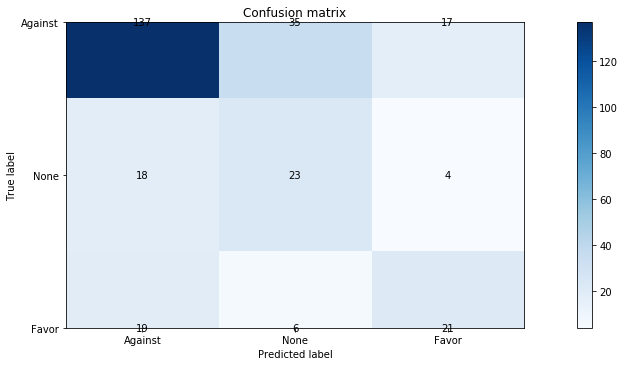

In [72]:
#Abortion
f1_abort, report_abort, confuse_abort = elmo_svm(train_vectors, test_vectors, 
                                                 ['Legalization of Abortion'])
print("F1 score for Abortion", f1_abort)
print(report_abort)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_abort, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.1890420913696289
Prediction time: 0.05554819107055664
F1 score for climate change 0.4818428184281844
              precision    recall  f1-score   support

     Against       0.00      0.00      0.00        11
        None       0.53      0.69      0.60        35
       Favor       0.85      0.85      0.85       123

   micro avg       0.76      0.76      0.76       169
   macro avg       0.46      0.51      0.48       169
weighted avg       0.73      0.76      0.74       169



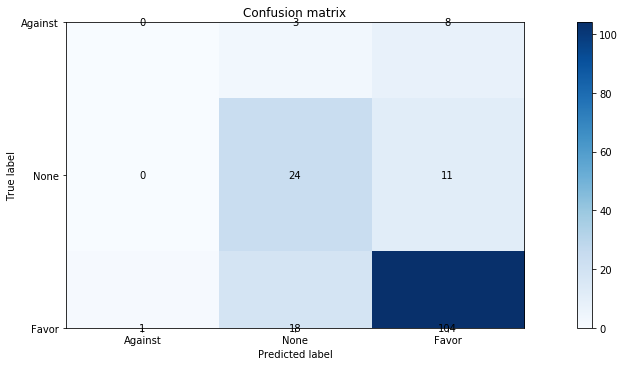

In [73]:
#Climate
f1_clim, report_clim, confuse_clim = elmo_svm(train_vectors, test_vectors, 
                                              ['Climate Change is a Real Concern'])
print("F1 score for climate change", f1_clim)
print(report_clim)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_clim, ['Against', 'None', 'Favor'])
plt.show()

Training time: 0.6275699138641357
Prediction time: 0.18067288398742676
F1 score for feminist mov 0.4757237890924837
              precision    recall  f1-score   support

     Against       0.73      0.63      0.67       183
        None       0.39      0.32      0.35        44
       Favor       0.33      0.52      0.40        58

   micro avg       0.56      0.56      0.56       285
   macro avg       0.48      0.49      0.48       285
weighted avg       0.59      0.56      0.57       285



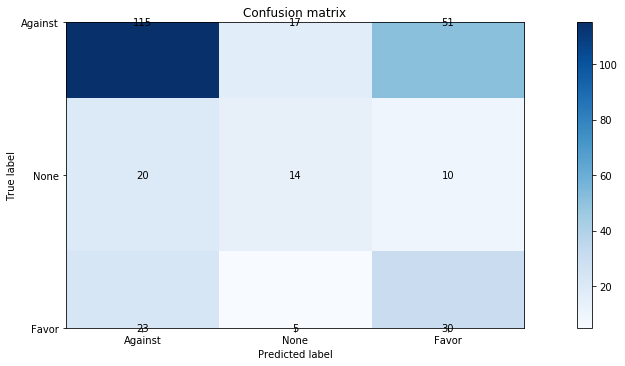

In [74]:
#Feminism
f1_fem, report_fem, confuse_fem = elmo_svm(train_vectors, test_vectors, 
                                           ['Feminist Movement'])
print("F1 score for feminist mov", f1_fem)
print(report_fem)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_fem, ['Against', 'None', 'Favor'])
plt.show()

Training time: 9.26669192314148
Prediction time: 3.1351001262664795
F1 score for all topics 0.5311938858422903
              precision    recall  f1-score   support

     Against       0.71      0.68      0.69       715
        None       0.39      0.49      0.43       230
       Favor       0.49      0.45      0.47       304

   micro avg       0.59      0.59      0.59      1249
   macro avg       0.53      0.54      0.53      1249
weighted avg       0.60      0.59      0.59      1249



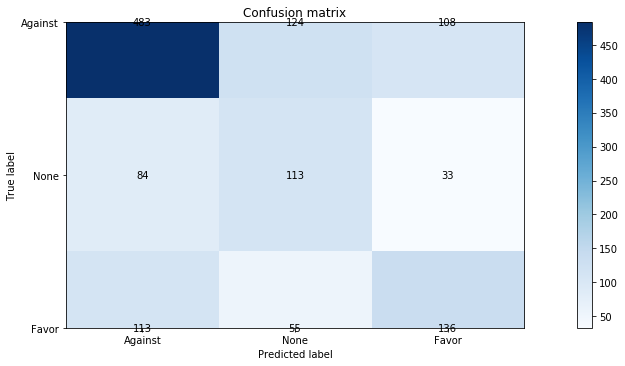

In [75]:
#All
all_tops = ['Hillary Clinton', 'Legalization of Abortion', 'Climate Change is a Real Concern',
           'Feminist Movement', 'Atheism']
f1_all, all_report, confuse_all = elmo_svm(train_vectors, test_vectors, all_tops)
print("F1 score for all topics", f1_all)
print(all_report)

plt.figure(figsize=(15, 5))
confusion_plot(confuse_all, ['Against', 'None', 'Favor'])
plt.show()